In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

<IPython.core.display.Javascript object>


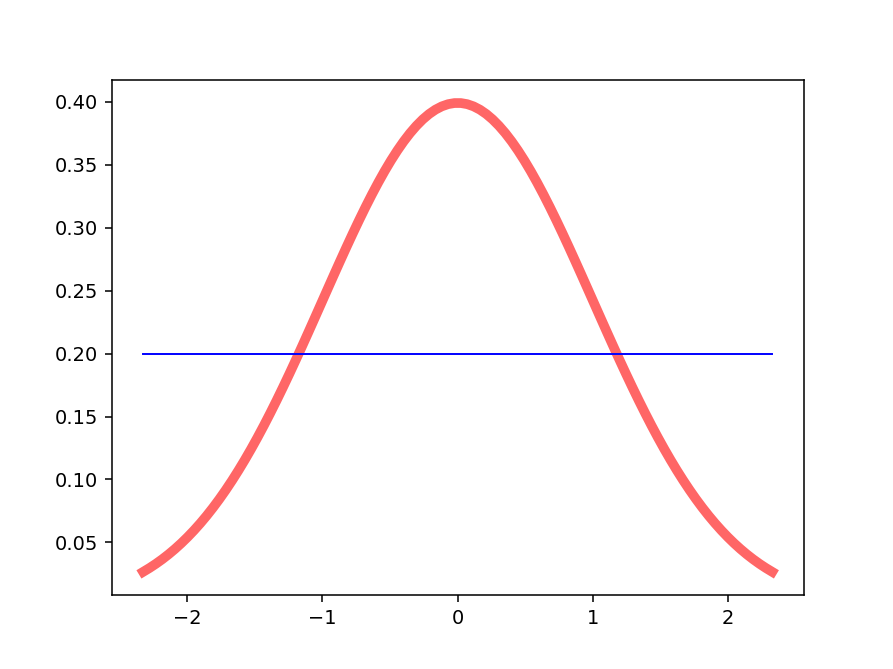

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

## Chargement des données

In [3]:
import pandas as pd
df = pd.read_table("data/TCL_wt1.tsv")

In [4]:
df

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
...,...,...,...,...,...,...,...
2019,P24240,6-phospho-beta-glucosidase AscB OS=Escherichia...,ascB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627
2022,P0AB40,Multiple stress resistance protein BhsA OS=Esc...,bhsA,1.798039216,0.846424487,0.035928,1.444561032


## Suppression des valeurs aberrantes

In [5]:
df2 = df.dropna()

In [6]:
df2

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460329,0.036746,1.434786589
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129104,0.310725,0.507623276
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634395861,0.013373,1.873756665
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627


In [7]:
df2 = df2.astype({'Log2 Corrected Abundance Ratio': np.float64, '-LOG10 Adj.P-val': np.float64})

In [8]:
df2.dtypes

Accession                                                        object
Description                                                      object
Gene Symbol                                                      object
Corrected Abundance ratio (1.53)                                 object
Log2 Corrected Abundance Ratio                                  float64
Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)    float64
-LOG10 Adj.P-val                                                float64
dtype: object

## Trace histogramme

<IPython.core.display.Javascript object>


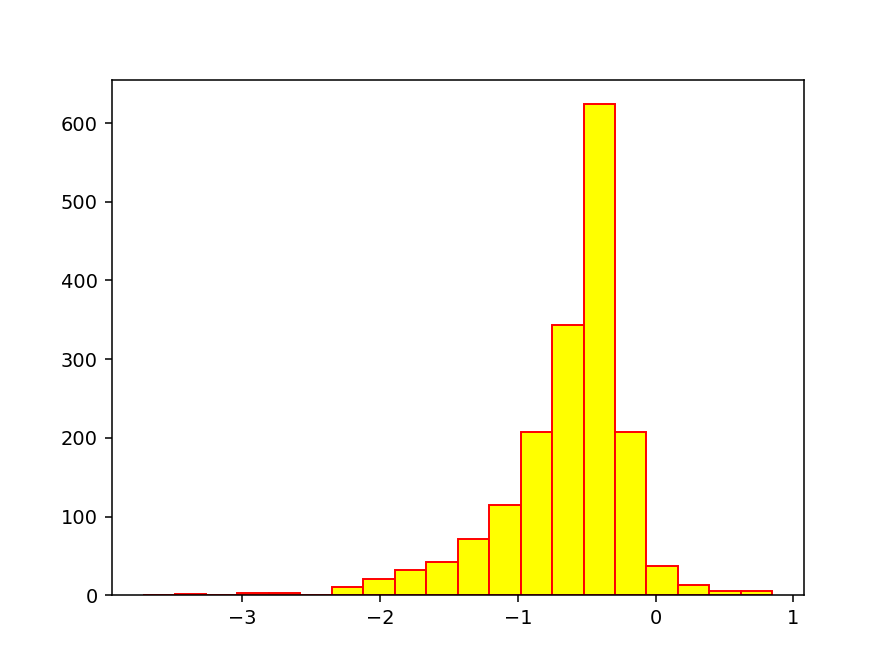

In [9]:
fig1, ax1 = plt.subplots()
ax1.hist(df2['Log2 Corrected Abundance Ratio'], color = 'yellow',
            edgecolor = 'red', bins = 20) #bins pour les classes
fig1.show()
# Nom different, attention sinon premiere fuigure 
#ax pour rajouter un dessin
# fig show met la figure de rendu

# numpy min et std  (la moyenne est un bon estimateur, std est a corrigé) sigma chap 2 = n /n+1 sigma2
# donne les parametres pour superposer

## Calcul de la moyenne et std pour la loi normale

In [10]:
mu = np.mean(df2['Log2 Corrected Abundance Ratio'])
mu

-0.6386262156443276

In [11]:
Std = np.var(df2['Log2 Corrected Abundance Ratio'])
Std

0.2214874351663623

In [12]:
n = len(df2['Log2 Corrected Abundance Ratio'])
n

1746

In [13]:
Std_estime = (n/(n-1)) * Std
Std_estime

0.2216143620633058

## Histogramme

<IPython.core.display.Javascript object>


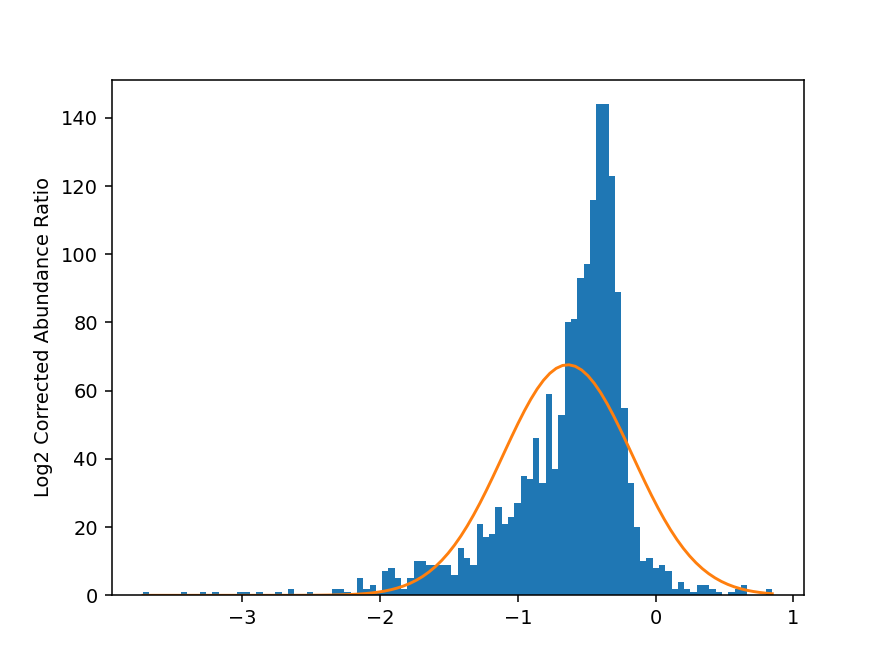

In [14]:
fig2, ax2 = plt.subplots()
hist = ax2.hist(df2['Log2 Corrected Abundance Ratio'], bins=100) # draw histogram
x = np.linspace(min(df2['Log2 Corrected Abundance Ratio']), max(df2['Log2 Corrected Abundance Ratio']), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(df2['Log2 Corrected Abundance Ratio'])*dx # scale accordingly
ax2.plot(x, norm.pdf(x, mu, np.sqrt(Std))*scale) # compute theoritical PDF and draw it
ax2.set_ylabel('Log2 Corrected Abundance Ratio')
fig2.show()

## Construction volcano

<IPython.core.display.Javascript object>


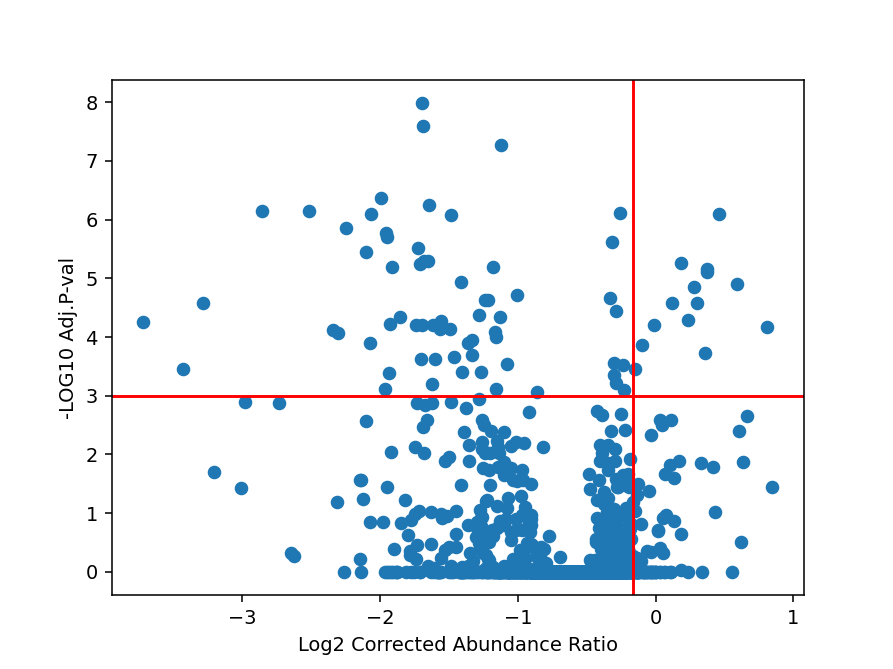

In [15]:
fig3, ax3 = plt.subplots()
ax3.scatter(df2["Log2 Corrected Abundance Ratio"], df2["-LOG10 Adj.P-val"])
ax3.axhline(y=-np.log10(0.001), Color = "red")
ax3.axvline(x=mu+np.sqrt(Std), Color = "red")
ax3.set_xlabel('Log2 Corrected Abundance Ratio')
ax3.set_ylabel('-LOG10 Adj.P-val')
fig3.show()

# Lsite de meme taille xi, yi
# Nombre 

## Analyse fonctionelle

Utilisation du cadran à droite et récupération avec un filtre, récupération des GO.
Fichier json avec les stats intéressantes.

In [16]:
df3 = df2[df2["Log2 Corrected Abundance Ratio"] > mu+np.sqrt(Std)]
print(df3.shape)
df3

(94, 7)


,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1850,P0A8F0,Uracil phosphoribosyltransferase OS=Escherichi...,upp,0.892156863,-0.164631,0.528256,0.277155
1851,P11875,Arginine--tRNA ligase OS=Escherichia coli (str...,argS,0.892810458,-0.163574,0.063902,1.194485
1852,P0AAH8,Putrescine export system ATP-binding protein S...,sapF,0.892810458,-0.163574,1.000000,0.000000
1854,P22255,3'(2').5'-bisphosphate nucleotidase CysQ OS=Es...,cysQ,0.898039216,-0.155150,1.000000,0.000000
1859,P0AB18,Sulfurtransferase TusE OS=Escherichia coli (st...,tusE,0.899346405,-0.153051,1.000000,0.000000
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129,0.310725,0.507623
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634396,0.013373,1.873757
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.659686,0.002226,2.652391
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390,0.000068,4.164956


In [20]:
df4 =  df3[df3["-LOG10 Adj.P-val"]> -np.log10(0.001)]
print(df4.shape)
df4

(14, 7)


,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1862,P0A8V6,Fatty acid metabolism regulator protein OS=Esc...,fadR,0.90130719,-0.149909,3.510530e-04,3.454627
1898,P0A9Q1,Aerobic respiration control protein ArcA OS=Es...,arcA,0.931372549,-0.102570,1.359440e-04,3.866640
1929,P02358,30S ribosomal protein S6 OS=Escherichia coli (...,rpsF,0.990849673,-0.013262,6.276360e-05,4.202292
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083006536,0.115042,2.679790e-05,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133986928,0.181404,5.518020e-06,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856209,0.231256,5.109990e-05,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.21372549,0.279442,1.408320e-05,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230718954,0.299501,2.679790e-05,4.571899
1989,P10384,Long-chain fatty acid transport protein OS=Esc...,fadL,1.283660131,0.360263,1.849300e-04,3.732993
1992,P06971,Ferrichrome outer membrane transporter/phage r...,fhuA,1.293464052,0.371240,6.974880e-06,5.156463


In [22]:
GO = df4["Accession"]
GO

1862    P0A8V6
1898    P0A9Q1
1929    P02358
1968    P0ACF8
1977    P62399
1979    P0A905
1982    P76506
1984    P13036
1989    P10384
1992    P06971
1996    P0A910
2003    P06996
2009    P76344
2021    P02931
Name: Accession, dtype: object